In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# **DATA PREPROCESSING**

In [ ]:
train = pd.read_csv('gdrive/My Drive/cycletrain.csv')
test = pd.read_csv('gdrive/My Drive/cycletest.csv')

In [ ]:
train_x = train.iloc[:, 0:9].values
train_x = pd.DataFrame(train_x, columns = train.columns[0:9])
train_y = train.iloc[:, 9:12].values
train_y = pd.DataFrame(train_y, columns = train.columns[9:12])
test_x = test

In [ ]:
train_x.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0,0,1,1,2011
1,1,0,0,1,9.02,13.635,80,0,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0,2,1,1,2011
3,1,0,0,1,9.84,14.395,75,0,3,1,1,2011
4,1,0,0,1,9.84,14.395,75,0,4,1,1,2011


In [ ]:
test_x.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train_y.head()

,casual,registered,count
0,3,13,16
1,8,32,40
2,5,27,32
3,3,10,13
4,0,1,1


In [ ]:
for dataset in [train_x, test_x]:
    dataset['hour'] = dataset['datetime'].str[11:13]

### Data sets are splited into two part just to apply the loop

In [ ]:
train_x_1 = pd.DataFrame(train_x.iloc[:5000 , :].values, columns = train_x.columns )
train_x_2 = pd.DataFrame(train_x.iloc[5000: , :].values, columns = train_x.columns )

In [ ]:
for dataset in [train_x_1, train_x_2]:
    dataset['day'] = dataset['datetime'].str[0:2]

for dataset in [train_x_1, train_x_2]:
    dataset['month'] = dataset['datetime'].str[3:5]

for dataset in [train_x_1, train_x_2]:
    dataset['year'] = dataset['datetime'].str[6:10]

In [ ]:
test_x_1 = pd.DataFrame(test_x.iloc[:3000 , :].values, columns = test_x.columns )
test_x_2 = pd.DataFrame(test_x.iloc[3000: , :].values, columns = test_x.columns )

In [ ]:
for dataset in [test_x_1, test_x_2]:
    dataset['day'] = dataset['datetime'].str[8:10]

for dataset in [test_x_1, test_x_2]:
    dataset['month'] = dataset['datetime'].str[5:7]

for dataset in [test_x_1, test_x_2]:
    dataset['year'] = dataset['datetime'].str[0:4]

In [ ]:
test_x = pd.concat([test_x_1, test_x_2], axis = 0)
test_x = test_x.drop(['datetime'], axis = 1)

train_x = pd.concat([train_x_1, train_x_2], axis = 0)
train_x = train_x.drop(['datetime'], axis = 1)

In [ ]:
train_x.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0,0,1,1,2011
1,1,0,0,1,9.02,13.635,80,0,1,1,1,2011
2,1,0,0,1,9.02,13.635,80,0,2,1,1,2011
3,1,0,0,1,9.84,14.395,75,0,3,1,1,2011
4,1,0,0,1,9.84,14.395,75,0,4,1,1,2011


In [ ]:
test_x.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,1,1,10.66,11.365,56,26.0027,00,20,01,2011
1,1,0,1,1,10.66,13.635,56,0,01,20,01,2011
2,1,0,1,1,10.66,13.635,56,0,02,20,01,2011
3,1,0,1,1,10.66,12.88,56,11.0014,03,20,01,2011
4,1,0,1,1,10.66,12.88,56,11.0014,04,20,01,2011


In [ ]:
train_x = train_x.reset_index(drop=True)
test_x = test_x.reset_index(drop=True)

In [ ]:
print(train_x.dtypes) #All the features are object type have to be converted to integer and float type 

season        object
holiday       object
workingday    object
weather       object
temp          object
atemp         object
humidity      object
windspeed     object
hour          object
day           object
month         object
year          object
dtype: object


In [ ]:
train_x['day']=train_x['day'].astype('int')
train_x['month']=train_x['month'].astype('int')
train_x['year']=train_x['year'].astype('int')
train_x['hour']=train_x['hour'].astype('int')
train_x['season']=train_x['season'].astype('int')
train_x['holiday']=train_x['holiday'].astype('int')
train_x['workingday']=train_x['workingday'].astype('int')
train_x['weather']=train_x['weather'].astype('int')
train_x['temp']=train_x['temp'].astype('float')
train_x['atemp']=train_x['atemp'].astype('float')
train_x['humidity']=train_x['humidity'].astype('int')
train_x['windspeed']=train_x['windspeed'].astype('int')

In [ ]:
test_x['day']=test_x['day'].astype('int')
test_x['month']=test_x['month'].astype('int')
test_x['year']=test_x['year'].astype('int')
test_x['hour']=test_x['hour'].astype('int')
test_x['season']=test_x['season'].astype('int')
test_x['holiday']=test_x['holiday'].astype('int')
test_x['workingday']=test_x['workingday'].astype('int')
test_x['weather']=test_x['weather'].astype('int')
test_x['temp']=test_x['temp'].astype('float')
test_x['atemp']=test_x['atemp'].astype('float')
test_x['humidity']=test_x['humidity'].astype('int')
test_x['windspeed']=test_x['windspeed'].astype('int')

In [ ]:
print(train_x.dtypes)

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed       int64
hour            int64
day             int64
month           int64
year            int64
dtype: object


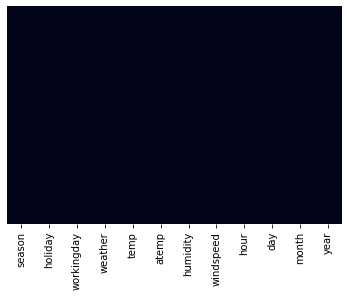

In [ ]:
sns.heatmap(train_x.isnull(),yticklabels=False,cbar=False) #just to check if there is any null values present

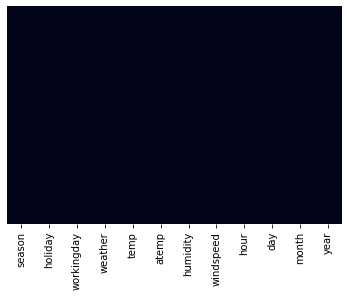

In [ ]:
sns.heatmap(test_x.isnull(),yticklabels=False,cbar=False) #just to check if there is any null values present

In [ ]:
df = pd.concat([train_x, train_y['count']], axis = 1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year,count
0,1,0,0,1,9.84,14.395,81,0,0,1,1,2011,16
1,1,0,0,1,9.02,13.635,80,0,1,1,1,2011,40
2,1,0,0,1,9.02,13.635,80,0,2,1,1,2011,32
3,1,0,0,1,9.84,14.395,75,0,3,1,1,2011,13
4,1,0,0,1,9.84,14.395,75,0,4,1,1,2011,1


# **DATA VISUALIZATION**

# Plotting the **pairplot** to check if there are highly correlated features present

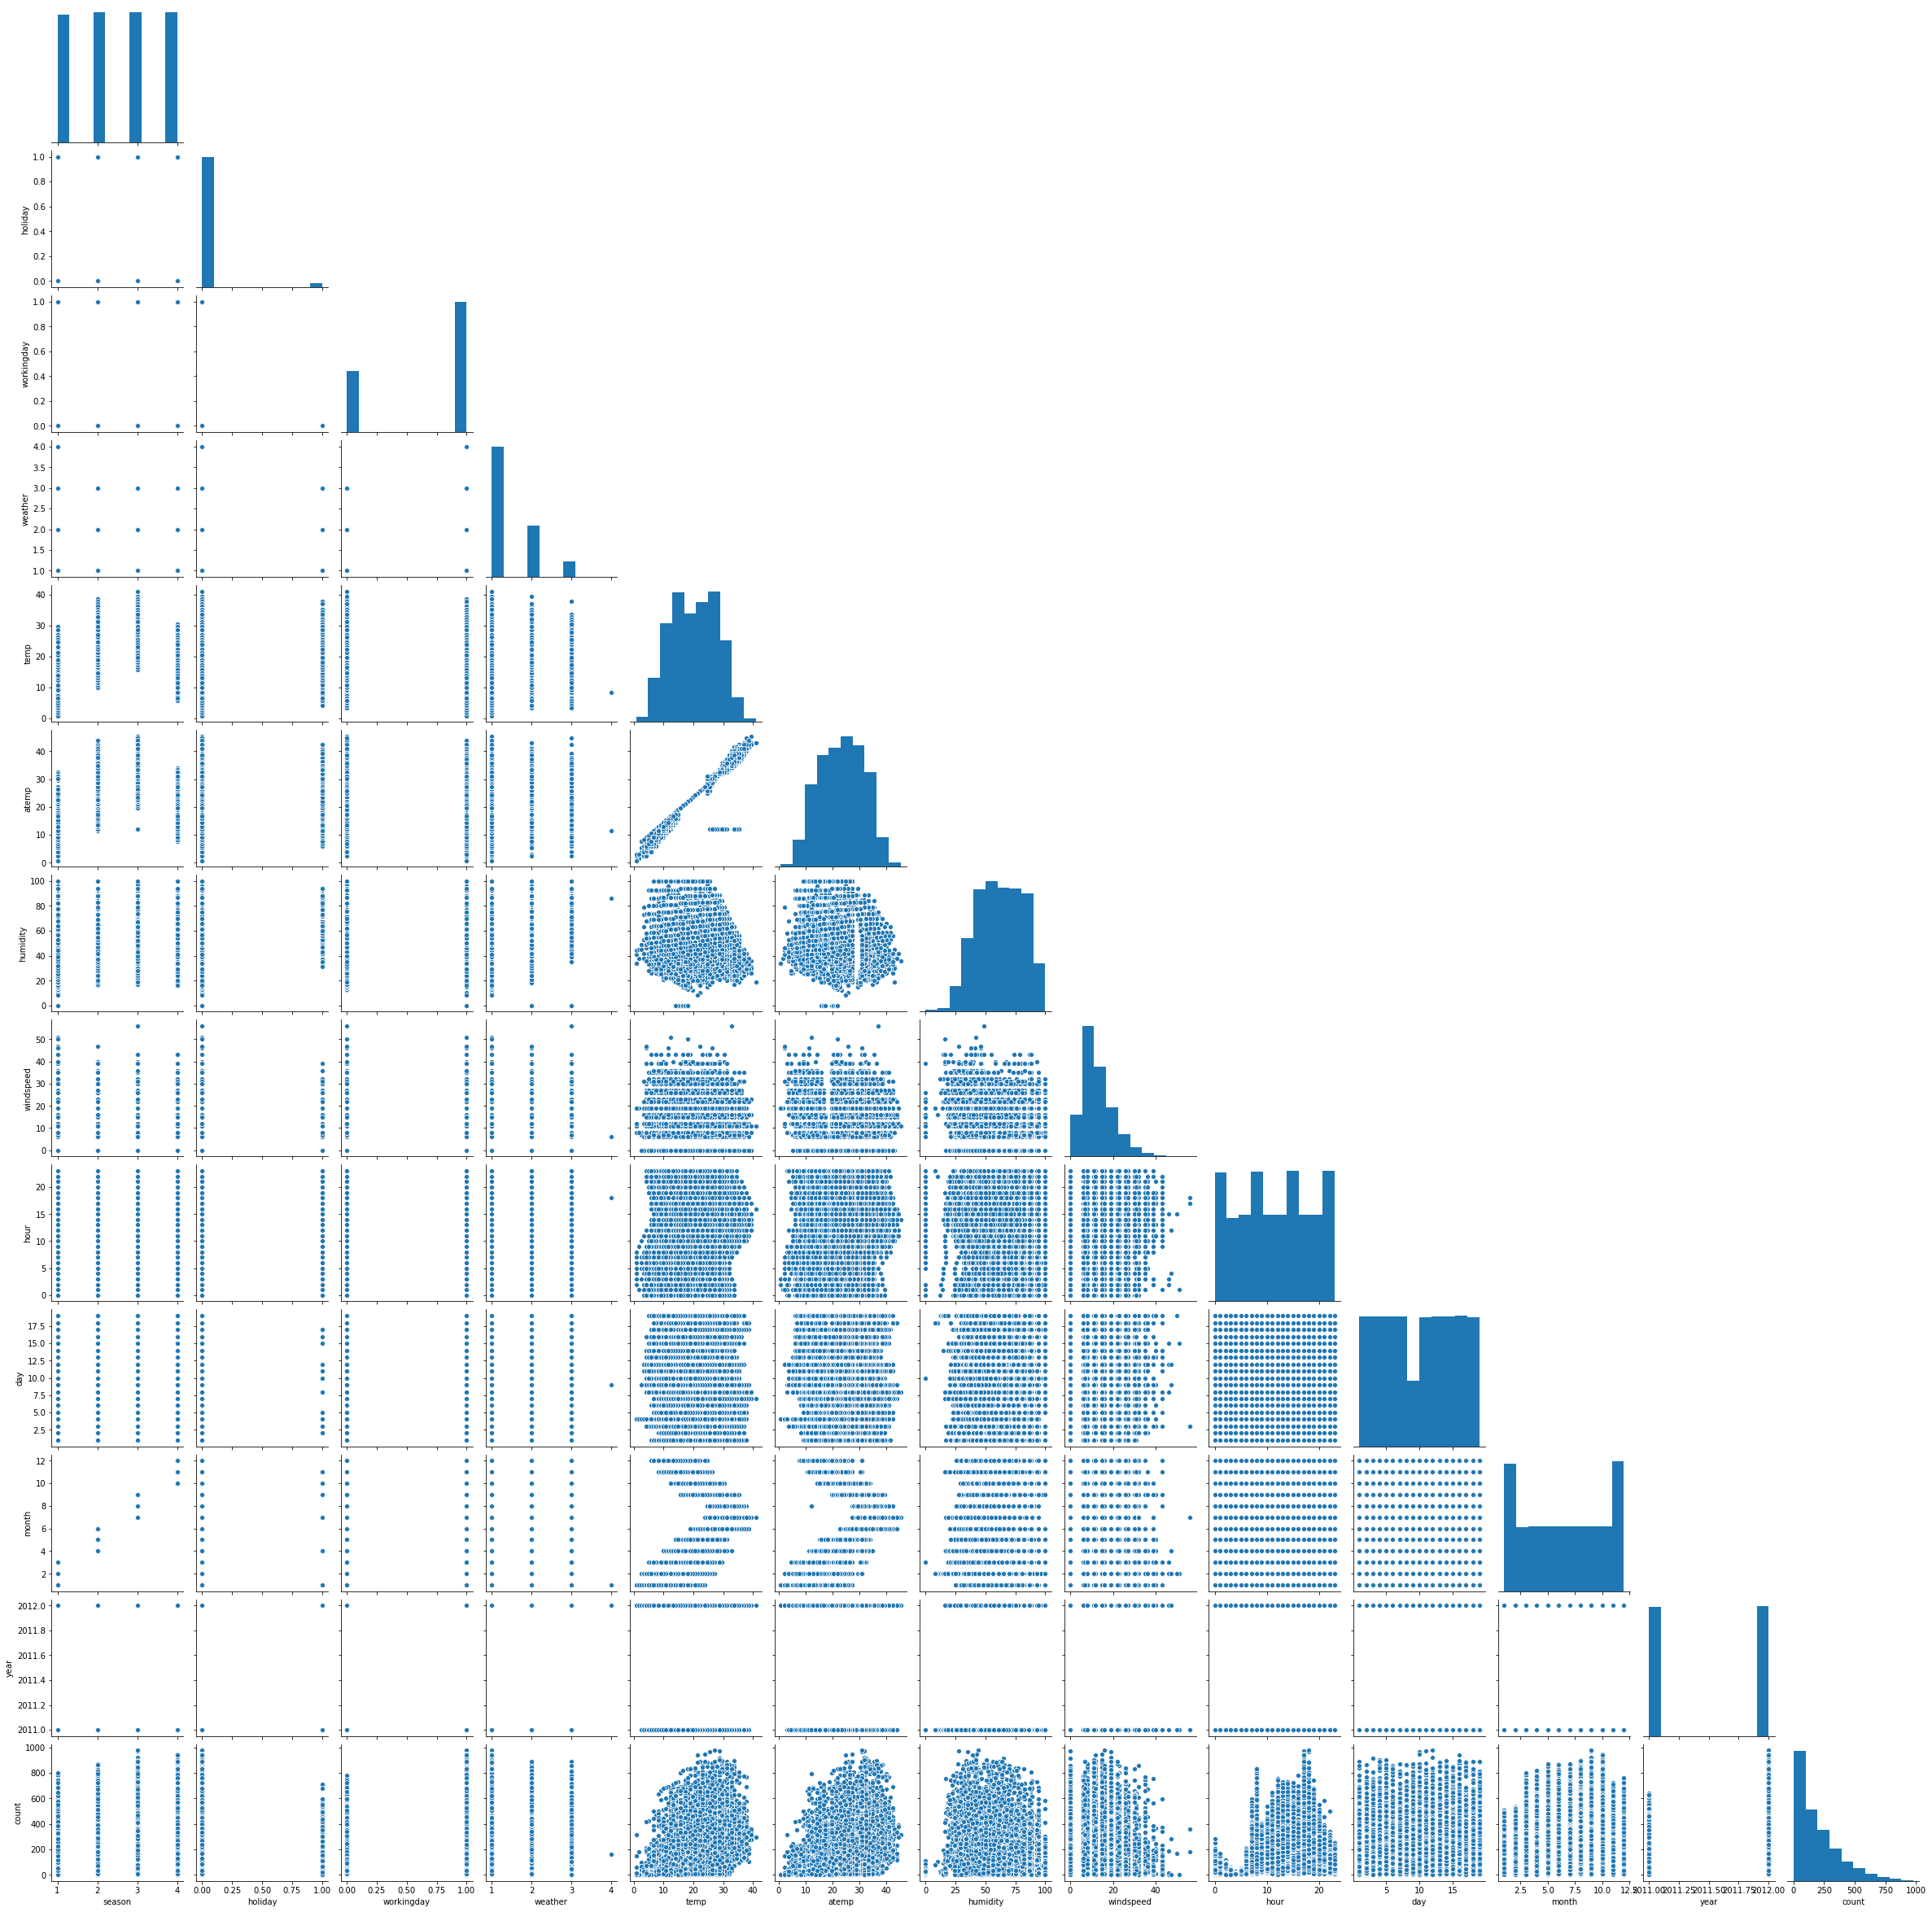

In [ ]:
sns.pairplot(df, corner=True)

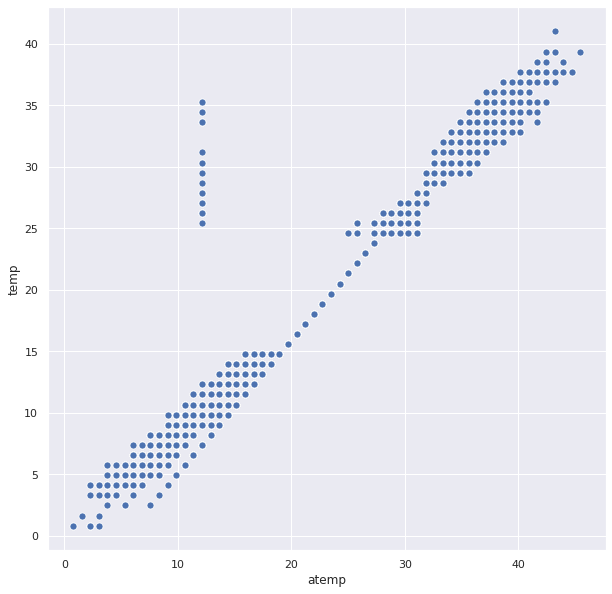

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.scatterplot(x='atemp', y='temp',data=df , s=50)

# **temp**  and  **atemp** are highly correlated values so one of them can be eliminated

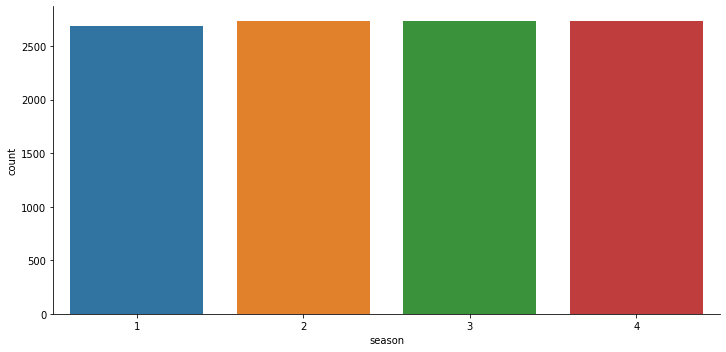

In [ ]:
sns.factorplot(x='season', data=df, kind='count',size=5,aspect=2)

# Total number of cycle rented in every season is approximately same

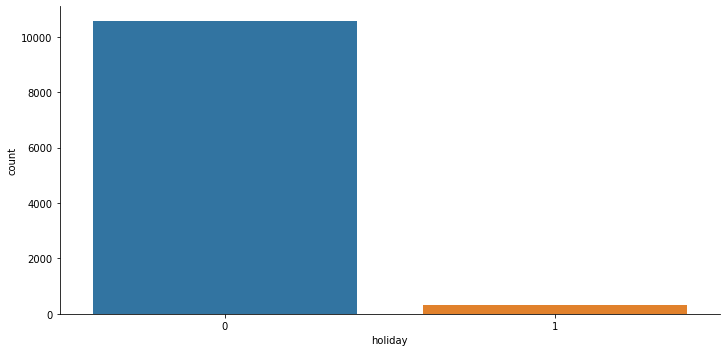

In [ ]:
sns.factorplot(x='holiday', data=df, kind='count',size=5,aspect=2)

# Total number of cycle rented on **holidays** is far less than **non holidays** 

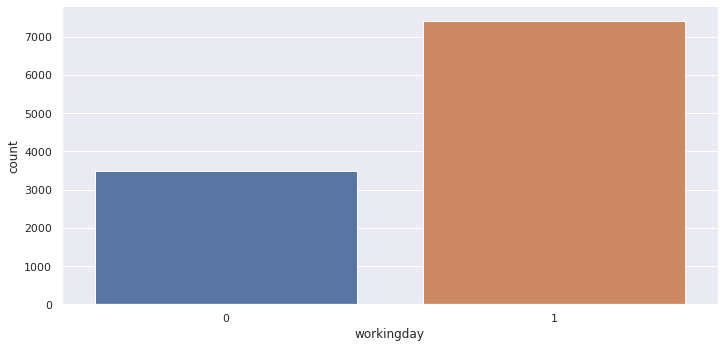

In [ ]:
sns.factorplot(x='workingday',data=df,kind='count',size=5,aspect=2)

# Total number of cycle rented on **workingdays** is higher than **non workingdays** 



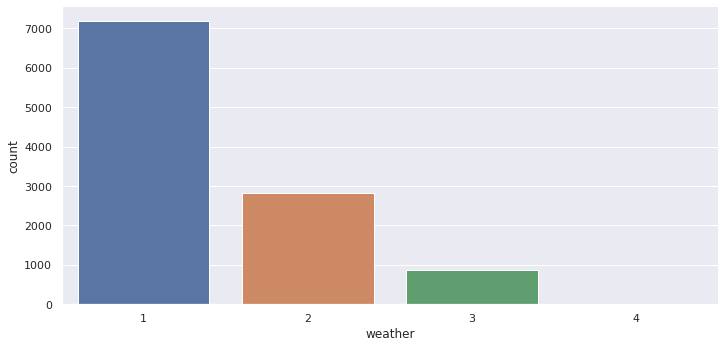

In [ ]:
sns.factorplot(x='weather',data=df,kind='count',size=5,aspect=2)

# Total number of cycle rented heavily dependent on weather condition

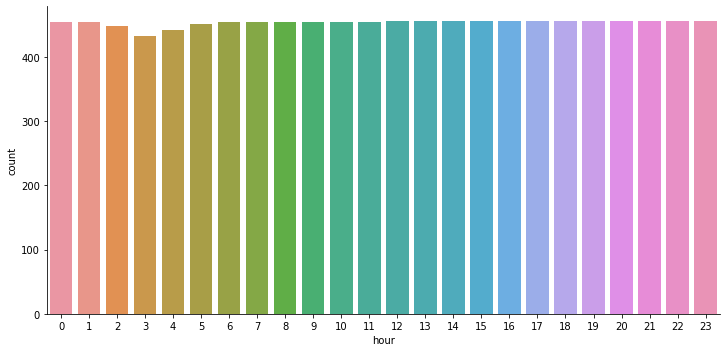

In [ ]:
sns.factorplot(x='hour',data=df,kind='count',size=5,aspect=2)

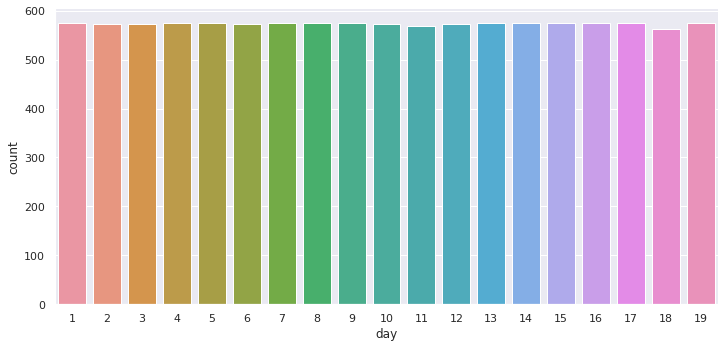

In [ ]:
sns.factorplot(x='day',data=df,kind='count',size=5,aspect=2)

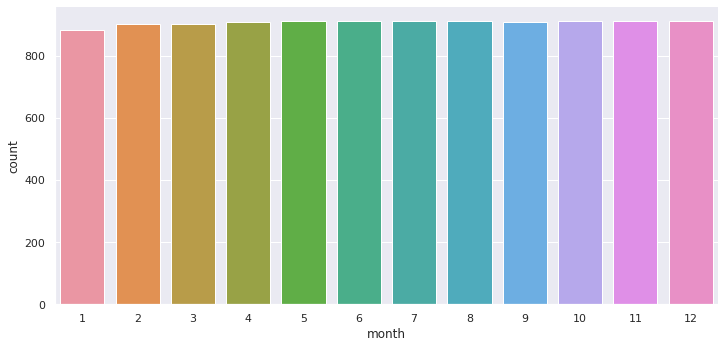

In [ ]:
sns.factorplot(x='month',data=df,kind='count',size=5,aspect=2)

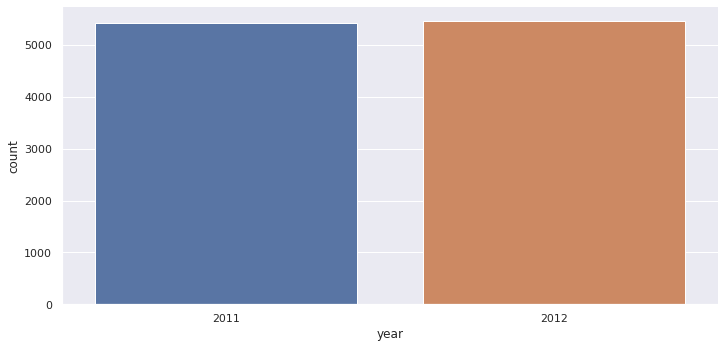

In [ ]:
sns.factorplot(x='year',data=df,kind='count',size=5,aspect=2)

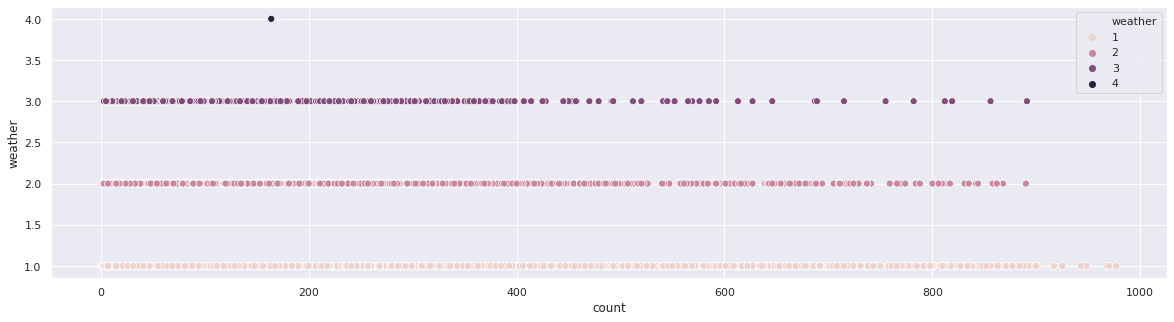

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
sns.scatterplot(x='count', y='weather', hue='weather', data=df , s=50)

# number of cycle rented on a **single day** is **heavily dependent** on weather condition

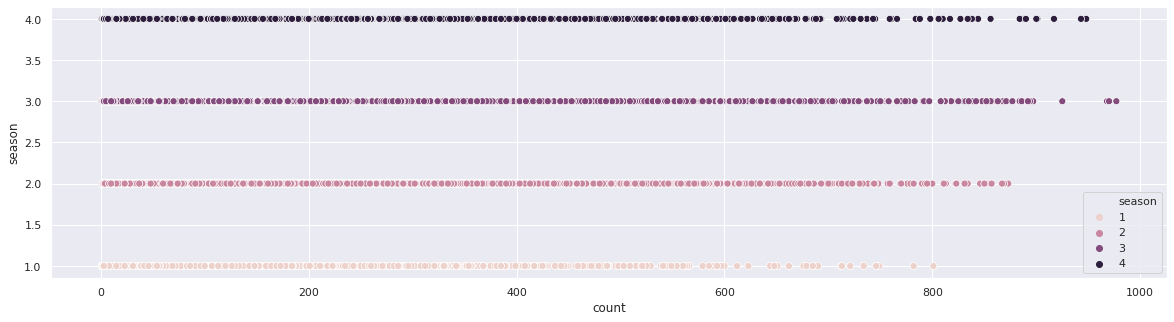

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
sns.scatterplot(x='count', y='season', hue='season', data=df , s=50)

## Although total number of cycle rented is almost same for all the seasons but if there is **more than 900** cycles rented on **a single day** then it is likely to happen in **Season 3 and 4** not in 1 and 2

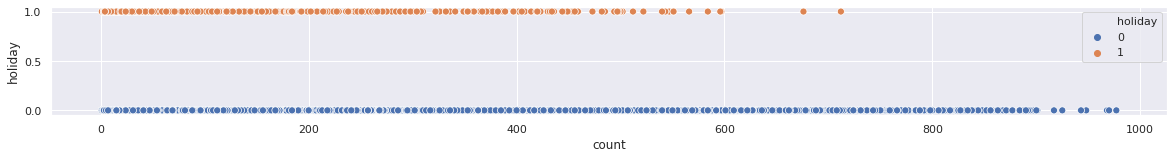

In [ ]:
sns.set(rc={'figure.figsize':(20,2)})
sns.scatterplot(x='count', y='holiday', hue='holiday', data=df , s=50)

# We can expect that on **holidays** number of cycle rented on a single day is likely to be **less than 600** 

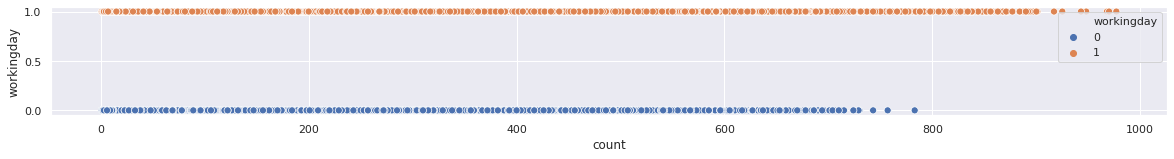

In [ ]:
sns.set(rc={'figure.figsize':(20,2)})
sns.scatterplot(x='count', y='workingday', hue='workingday', data=df , s=50)

# We can expect that on **non workingdays** number of cycle rented on a single day is likely to be **less than 800** 

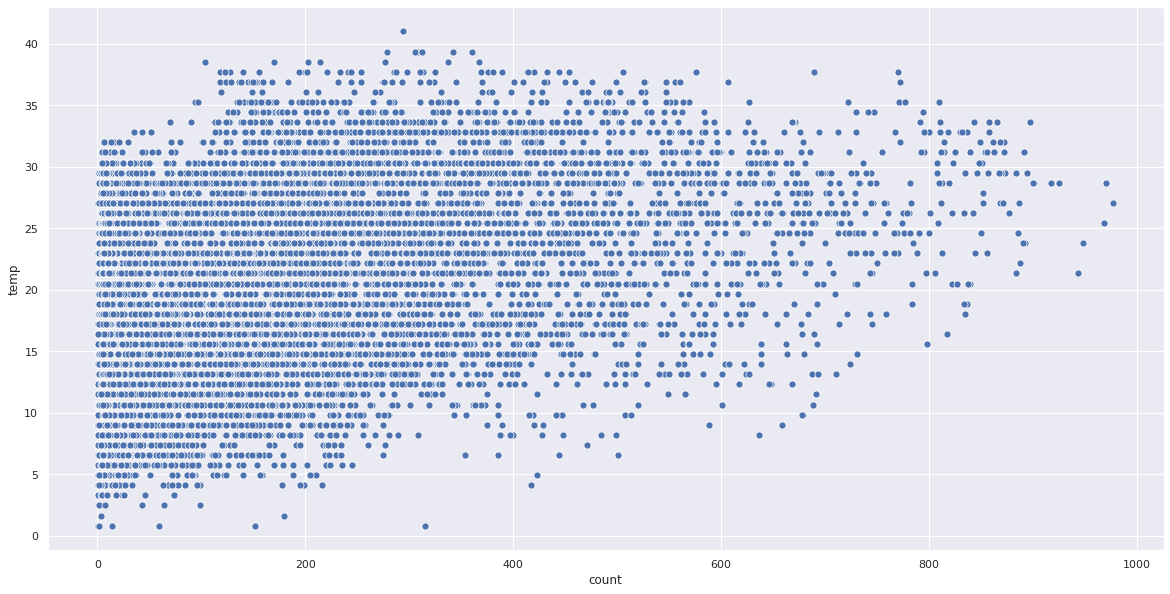

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x='count', y='temp', data=df , s=50)

# At very **low temp** number of cycle rented on a single day becomes less 

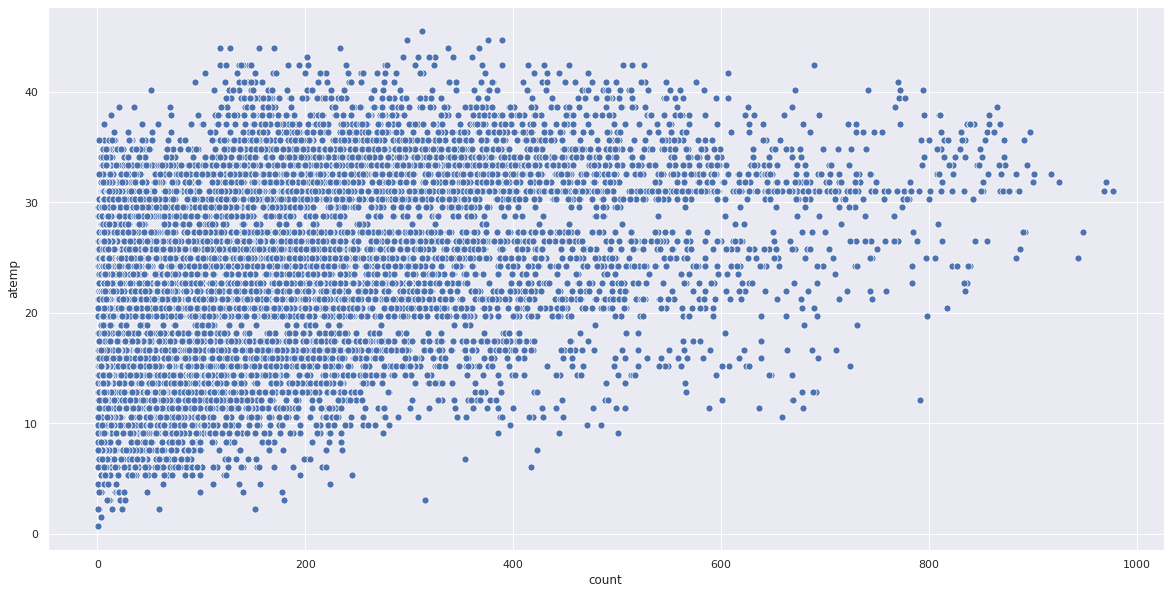

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x='count', y='atemp', data=df , s=50)

# At very **low atemp** number of cycle rented on a single day becomes less 

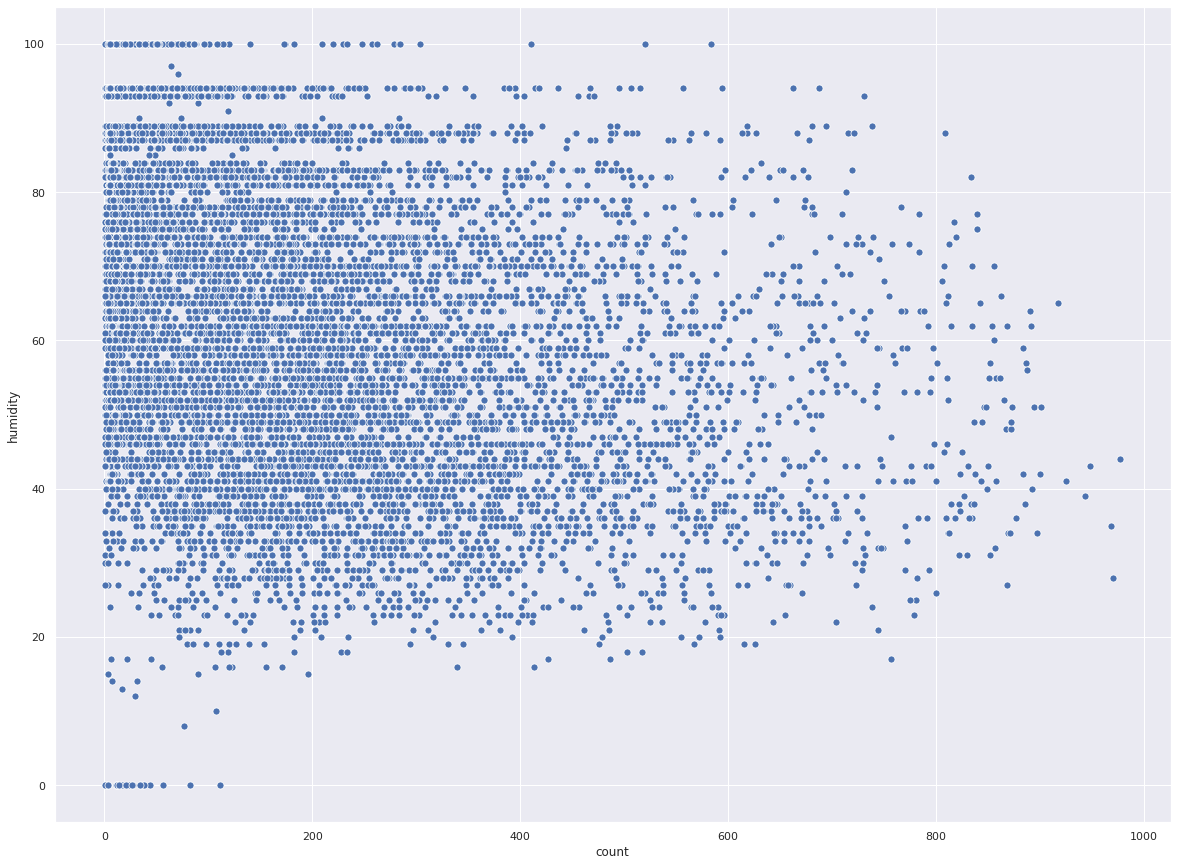

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
sns.scatterplot(x='count', y='humidity', data=df , s=50)

# **No proper correlation** is present between between **humidity** and number of cycle rented

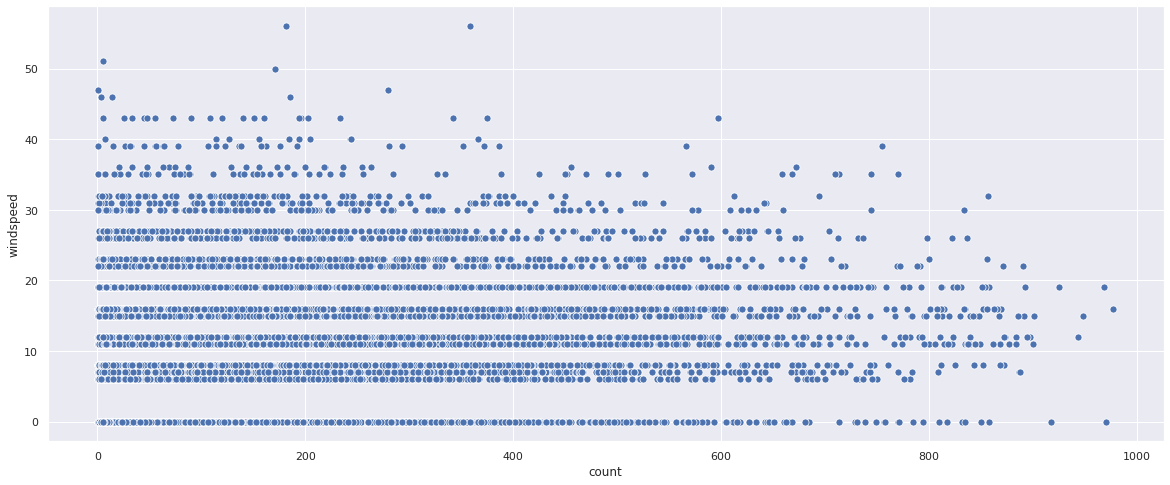

In [ ]:
sns.set(rc={'figure.figsize':(20,8)})
sns.scatterplot(x='count', y='windspeed', data=df , s=50)

# With very **high windspeed** number of cycle rented on a single day **becomes less**

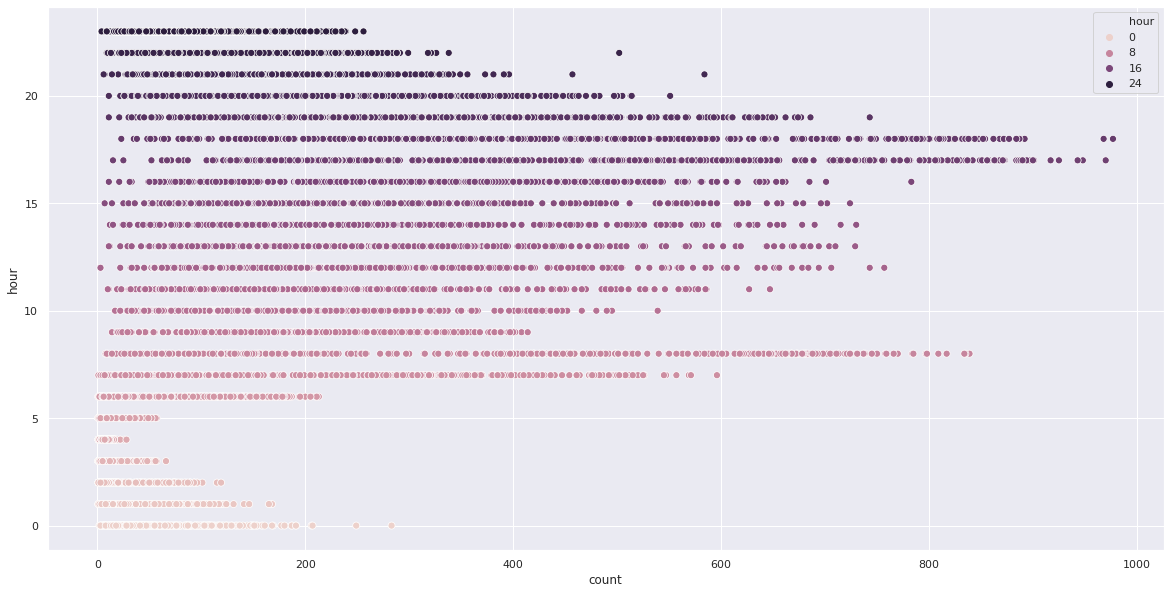

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x='count', y='hour', hue='hour' ,data=df , s=50)

# Number of cycle rented on a single day is least in the hour **from 0 to 6** and highest **from 12 to 19**

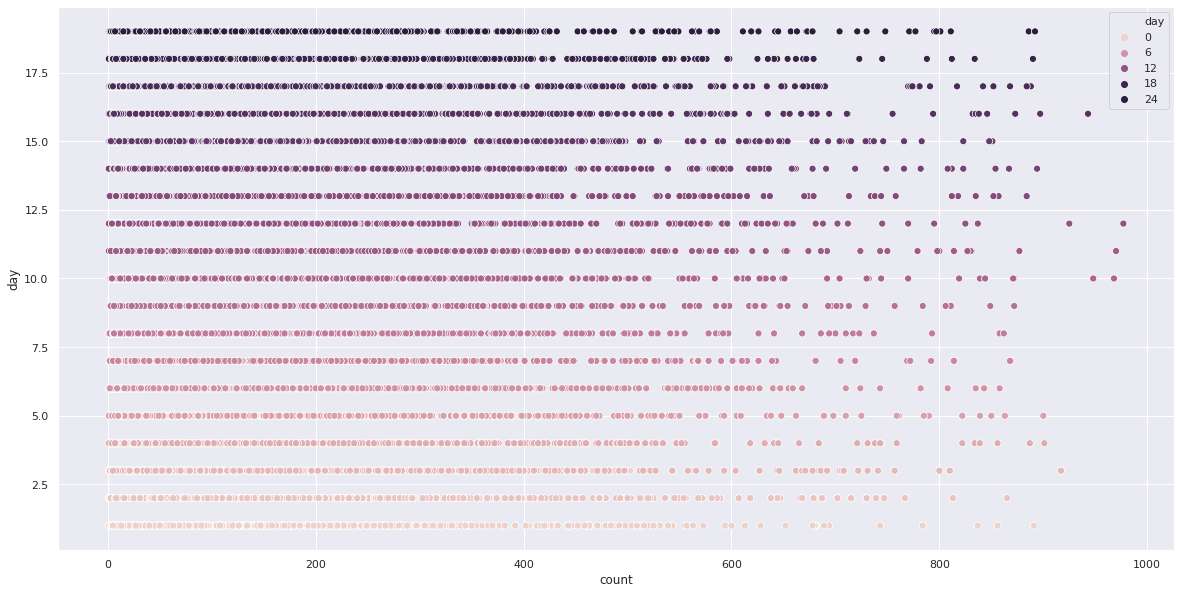

In [ ]:
sns.set(rc={'figure.figsize':(20,10)}sns.scatterplot(x='count', y='day', hue='day' ,data=df , s=50)

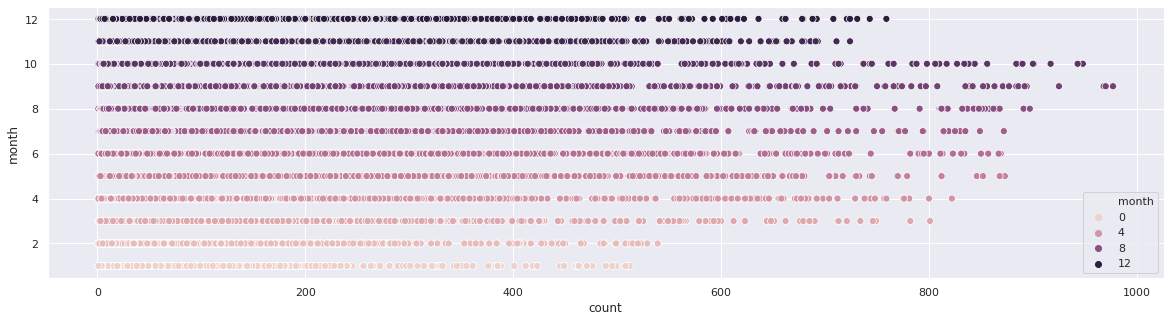

In [ ]:
sns.set(rc={'figure.figsize':(20, 5)})
sns.scatterplot(x='count', y='month', hue='month' ,data=df , s=50)

### Although the total number of cycle rented is almost same in all the months but highest number of cycle rented on a single day of **January and February** is around **500** whereas on **September and October** is around **900**

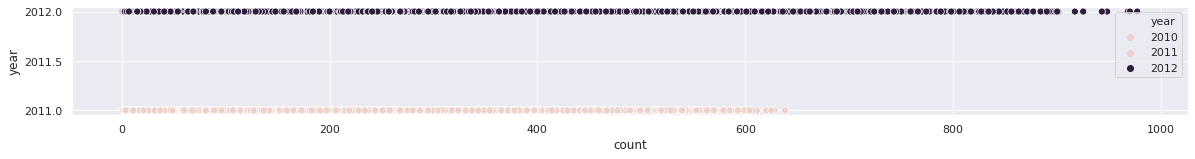

In [ ]:
sns.set(rc={'figure.figsize':(20, 2)})
sns.scatterplot(x='count', y='year', hue='year' ,data=df , s=50)

### Although total number of cycle rented in year 2011 and 2012 is same but on a single day the number of cycle rented in **year 2011** is likely to be **less than 600** whereas it can **go upto 900** in **year 2012**

#**FEATURE  ENGINEERING**

In [ ]:
season = pd.get_dummies(train_x['season'], drop_first=False)
season.columns = ['spring', 'summer','fall','winter']

In [ ]:
weather = pd.get_dummies(train_x['weather'], drop_first=False)
weather.columns = ['weather 1', 'weather 2','weather 3','weather 4']

In [ ]:
train_x = train_x.drop(['season','weather'], axis = 1)
train_x = pd.concat([train_x, season, weather],axis = 1)

In [ ]:
season = pd.get_dummies(test_x['season'], drop_first=False)
season.columns = ['spring', 'summer','fall','winter']

In [ ]:
weather = pd.get_dummies(test_x['weather'], drop_first=False)
weather.columns = ['weather 1', 'weather 2','weather 3','weather 4']

In [ ]:
test_x = test_x.drop(['season','weather'], axis = 1)
test_x = pd.concat([test_x, season, weather],axis = 1)

In [ ]:
train_x = train_x.drop(['atemp'], axis = 1) #Feature atemp is dropped because of it's high correlation with temp
test_x = test_x.drop(['atemp'], axis = 1)                          #(as mentioned earlier in data visualization)

In [ ]:
train_x.head()

,holiday,workingday,temp,humidity,windspeed,hour,day,month,year,spring,summer,fall,winter,weather 1,weather 2,weather 3,weather 4
0,0,0,9.84,81,0,0,1,1,2011,1,0,0,0,1,0,0,0
1,0,0,9.02,80,0,1,1,1,2011,1,0,0,0,1,0,0,0
2,0,0,9.02,80,0,2,1,1,2011,1,0,0,0,1,0,0,0
3,0,0,9.84,75,0,3,1,1,2011,1,0,0,0,1,0,0,0
4,0,0,9.84,75,0,4,1,1,2011,1,0,0,0,1,0,0,0


In [ ]:
test_x.head()

,holiday,workingday,temp,humidity,windspeed,hour,day,month,year,spring,summer,fall,winter,weather 1,weather 2,weather 3,weather 4
0,0,1,10.66,56,26,0,20,1,2011,1,0,0,0,1,0,0,0
1,0,1,10.66,56,0,1,20,1,2011,1,0,0,0,1,0,0,0
2,0,1,10.66,56,0,2,20,1,2011,1,0,0,0,1,0,0,0
3,0,1,10.66,56,11,3,20,1,2011,1,0,0,0,1,0,0,0
4,0,1,10.66,56,11,4,20,1,2011,1,0,0,0,1,0,0,0


# **MODEL SELECTION**



### From the **data visualization** done previously a decision can be made that features are not linearly correlated so lets try the other regression models 

In [ ]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
RandomForestRegressor = RandomForestRegressor()
score_RandomForestRegressor = cross_val_score(RandomForestRegressor, train_x, train_y['count'], cv=5, scoring= 'neg_mean_squared_log_error')
RandomForestRegression = -score_RandomForestRegressor.mean()
print(RandomForestRegression)

0.26786991552693673


In [ ]:
BaggingRegressor = BaggingRegressor()
score_BaggingRegressor = cross_val_score(BaggingRegressor, train_x, train_y['count'], cv=5, scoring= 'neg_mean_squared_log_error')
BaggingRegression = -score_BaggingRegressor.mean()
print(BaggingRegression)

0.27802409598515726


In [ ]:
AdaBoostRegressor = AdaBoostRegressor()
score_AdaBoostRegressor = cross_val_score(AdaBoostRegressor, train_x, train_y['count'], cv=5, scoring= 'neg_mean_squared_log_error')
AdaBoostRegression = -score_AdaBoostRegressor.mean()
print(AdaBoostRegression)

1.2024062990457187


In [ ]:
SVR = SVR()
score_SVR = cross_val_score(SVR, train_x, train_y['count'], cv=5, scoring= 'neg_mean_squared_log_error')
SVRegression = -score_SVR.mean()
print(SVRegression)

2.2608304448667322


In [ ]:
KNeighborsRegressor = KNeighborsRegressor()
score_KNeighborsRegressor = cross_val_score(KNeighborsRegressor, train_x, train_y['count'], cv=5, scoring= 'neg_mean_squared_log_error')
KNeighborsRegression = -score_KNeighborsRegressor.mean()
print(KNeighborsRegression)

1.2251263542962705


### **Xgboost**  , **Catboost**  and  **GradientBoosting**   regressor  is  not  used  because  they  predict  negetive  values

# **CONCLUSION**


### From the above experiments it can be concluded that **Randomforest algorithm** works better than other algorithms as it give **minimum error**

# **HYPERPARAMETER TUNING**

In [ ]:
regressor_cv = RandomForestRegressor()

In [ ]:
params={
        "n_estimators" : [10,50,100],
        "max_depth" : [15,20,25,30], 
        "min_samples_split" : [2,3,4,5], 
        "min_samples_leaf" : [1,2,3],
        "max_features" : [13,14,15,16,17]
        }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
RandomizedSearchCVregressor = RandomizedSearchCV(estimator = regressor_cv, param_distributions = params, n_iter=80, scoring='neg_mean_squared_log_error', n_jobs=1, cv=5)

In [ ]:
train_y_count = pd.DataFrame(train_y['count'])
RandomizedSearchCVregressor.fit(train_x ,train_y_count)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
RandomizedSearchCVregressor.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=15, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
RandomizedSearchCVregressor.best_params_

{'max_depth': 20,
 'max_features': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
best_regressor = RandomizedSearchCVregressor.best_estimator_
y_pred_count = best_regressor.predict(test_x)
y_pred_count = pd.DataFrame(y_pred_count, columns = ['count'])
y_pred_count = y_pred_count.round(decimals=0)

In [ ]:
read = pd.read_csv('gdrive/My Drive/sampleSubmission.csv')
submission_bycycle = pd.concat([read['datetime'], y_pred_count], axis = 1)
submission_bycycle.to_csv('submission_bycycle.csv', index=False)

In [ ]:
pwd

'/content'